**BATS & TBATS**
* BATS - Exponential Smoothing State Space model with Box-Cox transformation, ARMA errors, Trend and Seasonal Components.
* TBATS - Trigonometric Exponential Smoothing State Space model with Box-Cox transformation, ARMA errors, Trend and Seasonal Components.

In [23]:
# !pip install sktime[all_extras]
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=12090149 sha256=5667b3848673f16e7458c502f32df311a771f21eff022cc2e452f3d4f6d126c9
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3


In [6]:
!git clone https://github.com/marcopeix/time-series-analysis.git

Cloning into 'time-series-analysis'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 87 (delta 0), reused 0 (delta 0), pack-reused 84
Unpacking objects: 100% (87/87), 2.95 MiB | 8.05 MiB/s, done.


In [11]:
from google.colab import drive
import os

drive.mount('/content/drive/')
os.getcwd()

path = '/content/drive/My Drive/github_projects/time_series_analysis/'
os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['.git',
 '.gitignore',
 'README.md',
 'project.Rproj',
 'time_series_analysis_R.R',
 'acf_pacf.ipynb',
 'Aquifer_Petrignano.csv',
 'time_seires_analysis.ipynb',
 'time_series_forecasting_with_BATS_and_TBATS.ipynb',
 'daily_traffic.csv']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('daily_traffic.csv')
data = data.dropna()

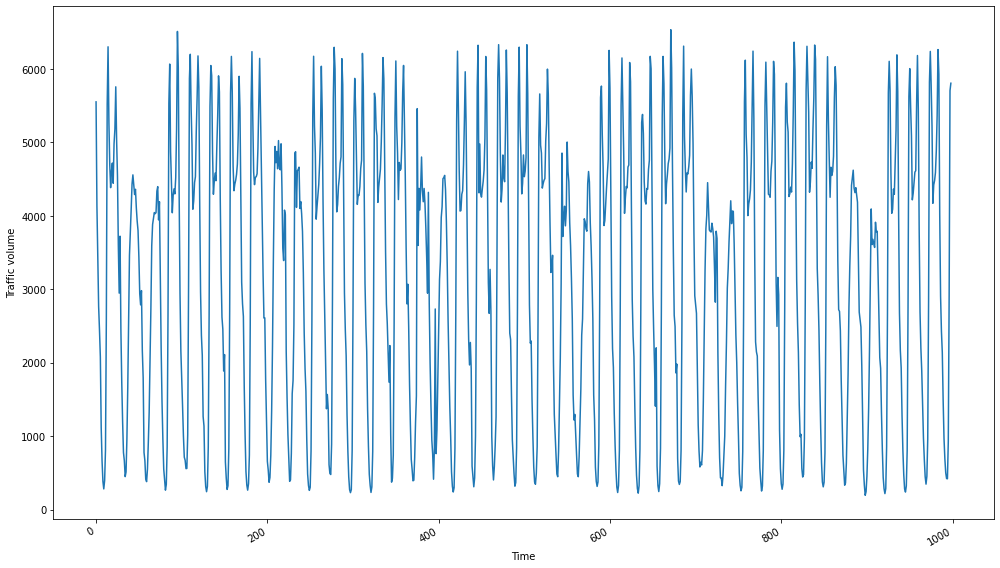

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

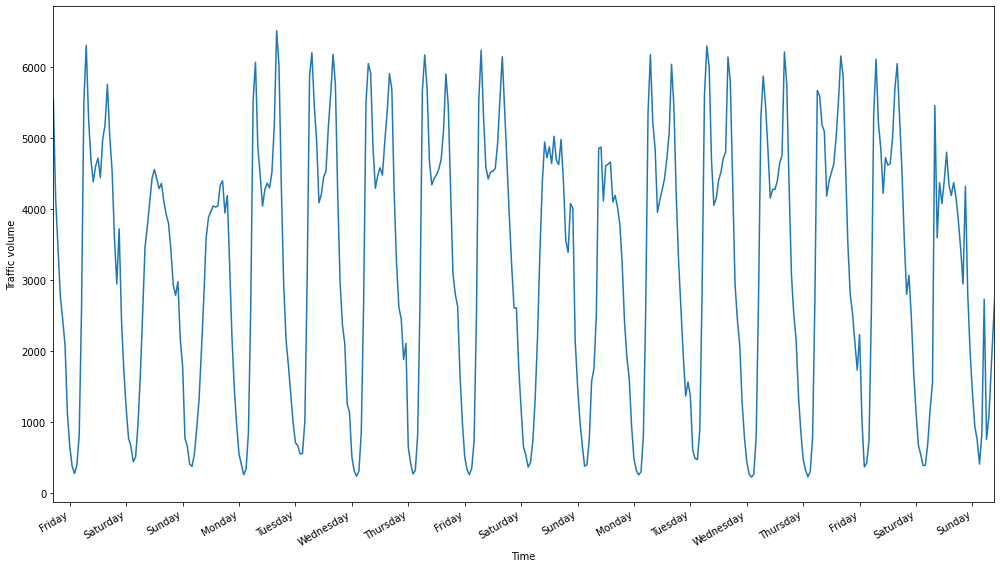

In [28]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')
plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)
fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [30]:
y = data['traffic_volume']
fh = np.arange(1, 168)

In [33]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=168)

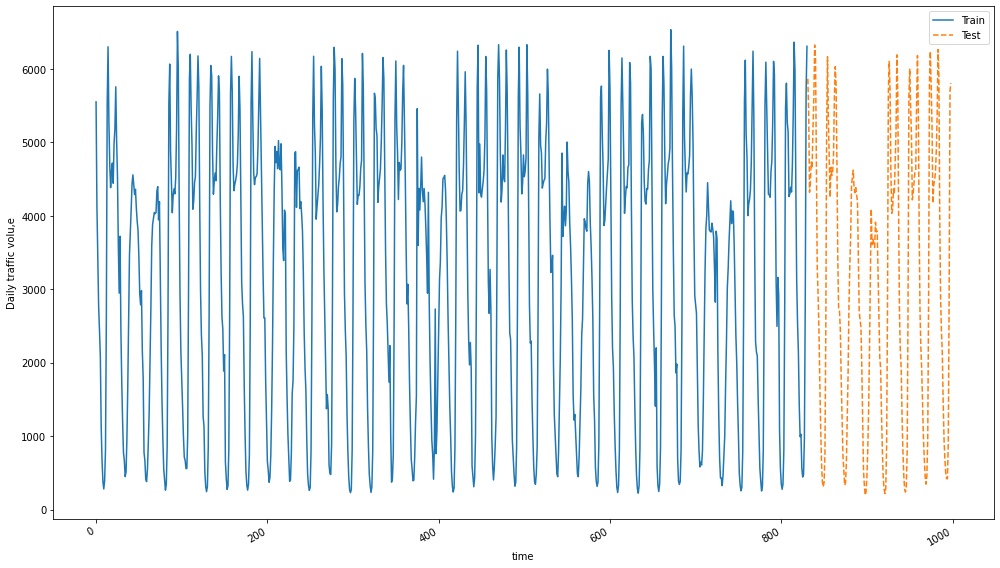

In [34]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='--', label='Test')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volu,e')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [35]:
y_pred_baseline = y_train[-168:].values

In [36]:
from sktime.forecasting.bats import BATS

forecaster = BATS(use_box_cox=True,
                  use_trend=False,
                  use_damped_trend=False,
                  sp=[24, 168])
forecaster.fit(y_train)

y_pred_BATS = forecaster.predict(fh)

In [37]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(use_box_cox=True,
                   use_trend=False,
                   use_damped_trend=False,
                   sp=[24, 168])
forecaster.fit(y_train)

y_pred_TBATS = forecaster.predict(fh)

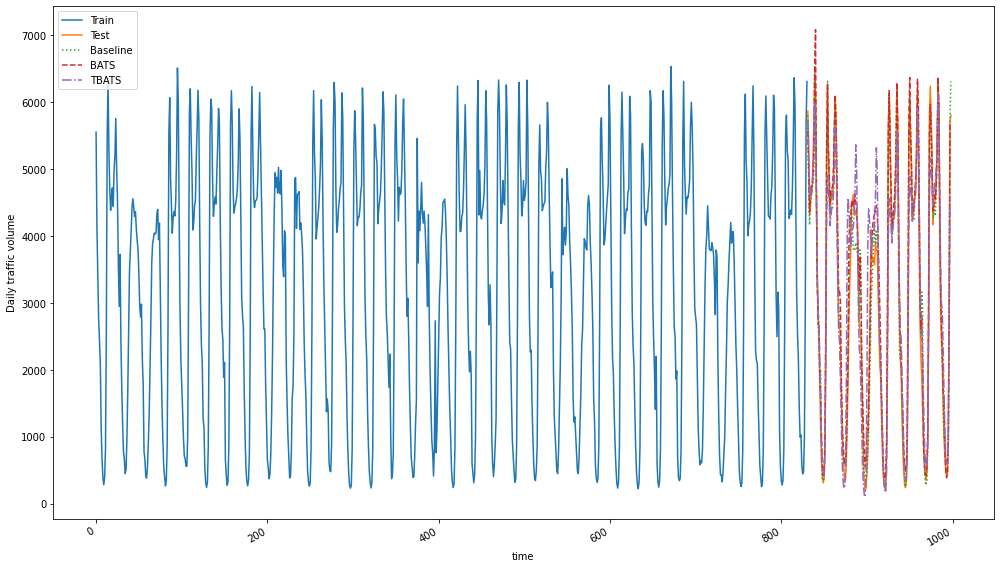

In [38]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='-', label='Test')
ax.plot(y_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_pred_BATS, ls='--', label='BATS')
ax.plot(y_pred_TBATS, ls='-.', label='TBATS')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volume')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [39]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

MAPE from baseline: 11.97
MAPE from BATS: 19.58
MAPE from TBATS: 29.53


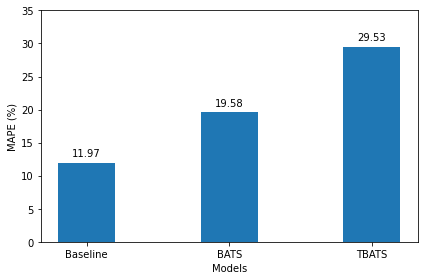

In [44]:
mape_baseline = mape(y_test, y_pred_baseline)
mape_BATS = mape(y_test, y_pred_BATS)
mape_TBATS = mape(y_test, y_pred_TBATS)

print(f'MAPE from baseline: {mape_baseline}')
print(f'MAPE from BATS: {mape_BATS}')
print(f'MAPE from TBATS: {mape_TBATS}')

fig, ax = plt.subplots()
x = ['Baseline', 'BATS', 'TBATS']
y = [mape_baseline, mape_BATS, mape_TBATS]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 35)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')
    
    plt.tight_layout()